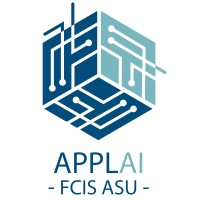

# **Data Description :**
1. ph: pH of 1. water (0 to 14).
2. Hardness: Capacity of water to precipitate soap in mg/L.
3. Solids: Total dissolved solids in ppm.
4. Chloramines: Amount of Chloramines in ppm.
5. Sulfate: Amount of Sulfates dissolved in mg/L.
6. Conductivity: Electrical conductivity of water in μS/cm.
7. Organic_carbon: Amount of organic carbon in ppm.
8. Trihalomethanes: Amount of Trihalomethanes in μg/L.
9. Turbidity: Measure of light emiting property of water in NTU.
10. Potability: Indicates if water is safe for human consumption. Potable -1 and Not potable -0

# **Overviewing Data :**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

In [ ]:
df = pd.read_csv('water_potability.csv')

In [ ]:
df.head()

ph    Hardness        Solids  Chloramines     Sulfate  Conductivity  \
0       NaN  204.890455  20791.318981     7.300212  368.516441    564.308654   
1  3.716080  129.422921  18630.057858     6.635246         NaN    592.885359   
2  8.099124  224.236259  19909.541732     9.275884         NaN    418.606213   
3  8.316766  214.373394  22018.417441     8.059332  356.886136    363.266516   
4  9.092223  181.101509  17978.986339     6.546600  310.135738    398.410813   

   Organic_carbon  Trihalomethanes  Turbidity  Potability  
0       10.379783        86.990970   2.963135           0  
1       15.180013        56.329076   4.500656           0  
2       16.868637        66.420093   3.055934           0  
3       18.436524       100.341674   4.628771           0  
4       11.558279        31.997993   4.075075           0

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [ ]:
df.describe().T.style.bar(subset = ['mean'],color = '#0366fc',vmax = 800)

In [ ]:
df[df['Potability'] == 0].describe()

ph     Hardness        Solids  Chloramines      Sulfate  \
count  1684.000000  1998.000000   1998.000000  1998.000000  1510.000000   
mean      7.085378   196.733292  21777.490788     7.092175   334.564290   
std       1.683499    31.057540   8543.068788     1.501045    36.745549   
min       0.000000    98.452931    320.942611     1.683993   203.444521   
25%       6.037723   177.823265  15663.057382     6.155640   311.264006   
50%       7.035456   197.123423  20809.618280     7.090334   333.389426   
75%       8.155510   216.120687  27006.249009     8.066462   356.853897   
max      14.000000   304.235912  61227.196008    12.653362   460.107069   

       Conductivity  Organic_carbon  Trihalomethanes    Turbidity  Potability  
count   1998.000000     1998.000000      1891.000000  1998.000000      1998.0  
mean     426.730454       14.364335        66.303555     3.965800         0.0  
std       80.047317        3.334554        16.079320     0.780282         0.0  
min      181.483754        4.371899         0.738000     1.450000         0.0  
25%      368.498530       12.101057        55.706530     3.444062         0.0  
50%      422.229331       14.293508        66.542198     3.948076         0.0  
75%      480.677198       16.649485        77.277704     4.496106         0.0  
max      753.342620       28.300000       120.030077     6.739000         0.0

In [ ]:
df[df['Potability'] == 1].describe()

ph     Hardness        Solids  Chloramines     Sulfate  \
count  1101.000000  1278.000000   1278.000000  1278.000000  985.000000   
mean      7.073783   195.800744  22383.991018     7.169338  332.566990   
std       1.448048    35.547041   9101.010208     1.702988   47.692818   
min       0.227499    47.432000    728.750830     0.352000  129.000000   
25%       6.179312   174.330531  15668.985035     6.094134  300.763772   
50%       7.036752   196.632907  21199.386614     7.215163  331.838167   
75%       7.933068   218.003420  27973.236446     8.199261  365.941346   
max      13.175402   323.124000  56488.672413    13.127000  481.030642   

       Conductivity  Organic_carbon  Trihalomethanes    Turbidity  Potability  
count   1278.000000     1278.000000      1223.000000  1278.000000      1278.0  
mean     425.383800       14.160893        66.539684     3.968328         1.0  
std       82.048446        3.263907        16.327419     0.780842         0.0  
min      201.619737        2.200000         8.175876     1.492207         1.0  
25%      360.939023       12.033897        56.014249     3.430909         1.0  
50%      420.712729       14.162809        66.678214     3.958576         1.0  
75%      484.155911       16.356245        77.380975     4.509569         1.0  
max      695.369528       23.604298       124.000000     6.494249         1.0

## Notes to be looked at : 
* Based on the mean-median values of the 9 input variables, our input variables seem to have very close to normal distibution with slight skewness.
* from the colored bars, columns are wide scaled and have much difference in scaling so it may be needed to be standrized if we're going to use algorithms with gradient descent
* ph, Sulfate columns has many null data
* more than 60% of water samples are not potable


# **Data Preprocessing :** 

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [ ]:
# counting nulls values
cols = df.columns
print("number of null values:\n")
print(df.isnull().sum())
print("*"*50)
print("\npercentage of null from data:\n")
print(df.isnull().mean()*100)

number of null values:

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64
**************************************************

percentage of null from data:

ph                 14.987790
Hardness            0.000000
Solids              0.000000
Chloramines         0.000000
Sulfate            23.840049
Conductivity        0.000000
Organic_carbon      0.000000
Trihalomethanes     4.945055
Turbidity           0.000000
Potability          0.000000
dtype: float64


In [ ]:
# visualizing null percentages
col = df.columns
Y = [0,5,10,15,20,25]
labels = ["0%","5%","10%","15%","20%","25%"]
nll = df.isna().mean()*100
fig = px.bar(x=col, y=nll,title="Percentage of null data in each column",labels={"y":"Percentage of null (%)","x":"Columns"})
fig.show()

In [ ]:
# counting how many rows contains any null value
print(df[pd.isnull(df).any(axis=1)].shape[0])

# it's percentage
df[pd.isnull(df).any(axis=1)].shape[0]*100 / df.shape[0]

1265


38.614163614163616

if dropping all rows with null values, 40% of the data will be removed so that's not a good choice

In [ ]:
df_temp = df[["ph","Sulfate","Trihalomethanes"]]

In [ ]:
from sklearn.impute import KNNImputer # by searching i foundout the knnimputer replace the nulls with the mean value of nearest elements in coloumn
imputer = KNNImputer()
df_temp = pd.DataFrame(imputer.fit_transform(df_temp), columns=df_temp.columns)
df_temp.isna().sum()  #making sure all outliers are replaced
df2 =df_temp


In [ ]:
df_temp["Hardness"] = df["Hardness"]
df_temp["Solids"] = df["Solids"]
df_temp["Chloramines"] = df["Chloramines"]
df_temp["Conductivity"] = df["Conductivity"]
df_temp["Organic_carbon"] = df["Organic_carbon"]
df_temp["Turbidity"] = df["Turbidity"]
df_temp["Potability"] = df["Potability"]

In [ ]:
df=df_temp
nulls=df.isnull().sum()
nulls = round(nulls[nulls!=0] / 3276*100, 3)
nulls

Series([], dtype: float64)

In [ ]:
cols = df.columns
print("number of null values:\n")
print(df.isnull().sum())
print("*"*50)
print("\npercentage of null from data:\n")
print(df.isnull().mean()*100)

number of null values:

ph                 0
Sulfate            0
Trihalomethanes    0
Hardness           0
Solids             0
Chloramines        0
Conductivity       0
Organic_carbon     0
Turbidity          0
Potability         0
dtype: int64
**************************************************

percentage of null from data:

ph                 0.0
Sulfate            0.0
Trihalomethanes    0.0
Hardness           0.0
Solids             0.0
Chloramines        0.0
Conductivity       0.0
Organic_carbon     0.0
Turbidity          0.0
Potability         0.0
dtype: float64


All Good ! Our data is totally cleaned , Let's move to the next step.

# **Exploratory Data Analysis :**

## Univariate Analysis

**1. Feature Analysis:**


* **1. Ph :** If the pH of water is too high or too low, the aquatic organisms living within it will die. pH can also affect the solubility and toxicity of chemicals and heavy metals in the water. The majority of aquatic creatures prefer a pH range of 6.5-9.0, though some can live in water with pH levels outside of this range.

In [ ]:
plt.style.use('fivethirtyeight')

<ipython-input-18-a90cd344a8e1>:2: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




<Axes: xlabel='ph', ylabel='Density'>

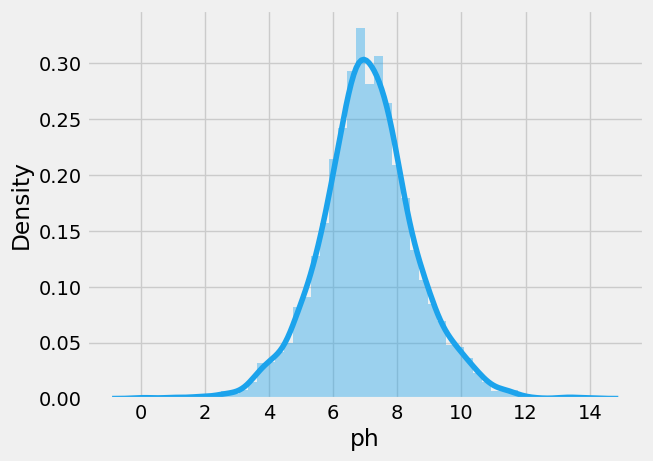

In [ ]:
col = df.columns
sns.distplot(df[col[0]],color = '#1ca3ec')

* **2. Hardness:** Water described as “hard” contains high amounts of naturally occurring dissolved calcium and magnesium. Total hardness is the sum of the calcium and magnesium concentrations, both expressed as calcium carbonate, in milligrams per liter (mg/L). You can determine your water’s hardness based on these concentrations of calcium carbonate:

* below 75 mg/L - is generally considered soft
* 76 to 150 mg/L - moderately hard
* 151 to 300 mg/L - hard
* more than 300 mg/ - very hard

<ipython-input-19-aacf0f693c0c>:1: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




<Axes: xlabel='Hardness', ylabel='Density'>

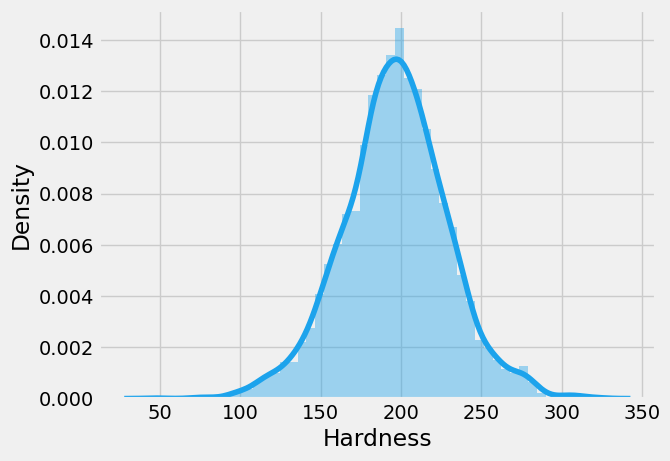

In [ ]:
sns.distplot(df[col[3]],color = '#1ca3ec')

* **3. Solids:** Total solids also affect water clarity. Higher solids decrease the passage of light through water, thereby slowing photosynthesis by aquatic plants. Water will heat up more rapidly and hold more heat; this, in turn, might adversely affect aquatic life that has adapted to a lower temperature regime.

In [ ]:
df['Solids'].corr(df['Turbidity'])
# The correlation = 0.02, we would test them again in the bivariate analysis

0.01954614418246366

* **4. Chloramines:** Chloramines have been used by water utilities since the 1930s.  More than one in five Americans uses drinking water treated with chloramines.

Water that contains chloramines and meets EPA regulatory standards is safe to use for:

* Drinking
* Cooking
* Bathing
* Other household uses
**but water containing Chloramines can combine with organic matter in water to produce toxic chemicals such as iodoacids and nitrosamines. According to David Sedlak of the University of California Berkeley**

<ipython-input-21-14e6cc97b3f9>:1: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




<Axes: xlabel='Chloramines', ylabel='Density'>

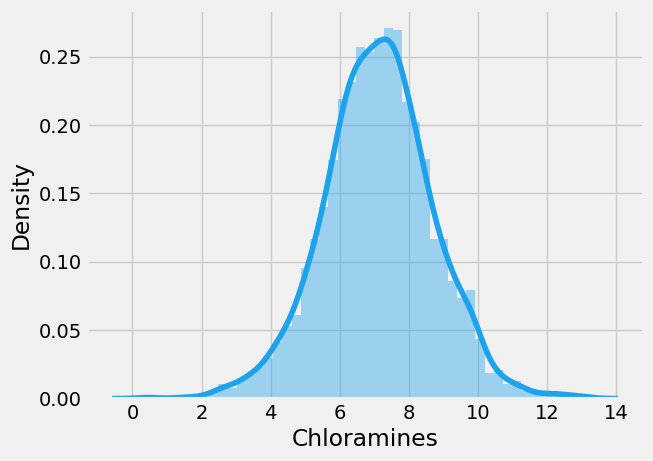

In [ ]:
sns.distplot(df[col[5]],color = '#1ca3ec')

* **5. Sulfates:** Sulfates are not considered toxic to plants or animals at normal concentrations. In humans, concentrations of `500 - 750 mg/L` cause a temporary laxative effect. However, doses of several thousand mg/L did not cause any long-term ill effects. At very high concentrations sulfates are toxic to cattle. Problems caused by sulfates are most often related to their ability to form strong acids which changes the pH. Sulfate ions also are involved in complexing and precipitation reactions which affect solubility of metals and other substances.

In [ ]:
df['Sulfate'].corr(df['ph'])

0.023768067630441172

<ipython-input-23-ea0f5e3fd473>:1: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




<Axes: xlabel='Sulfate', ylabel='Density'>

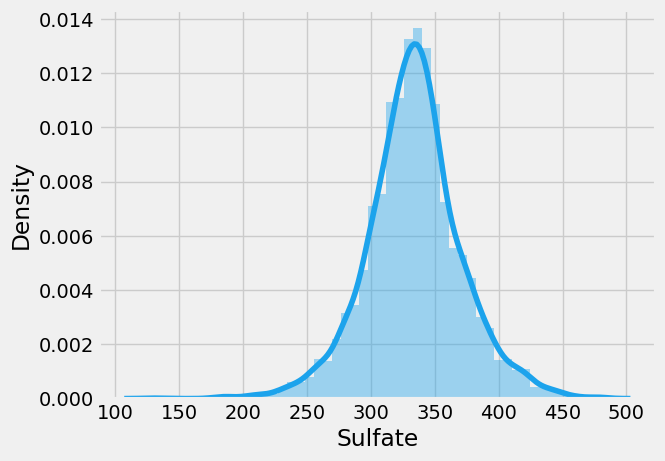

In [ ]:
sns.distplot(df[col[1]],color = '#1ca3ec')

<Axes: >

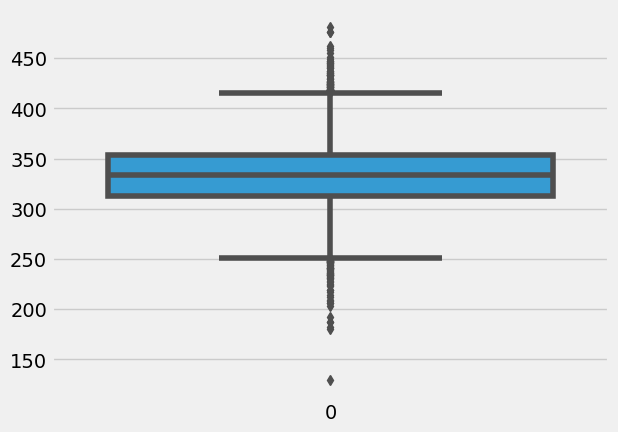

In [ ]:
sns.boxplot(df['Sulfate'],color = '#1ca3ec')

* **6. Conductivity:** Conductivity is useful as a general measure of water quality. Each water body tends to have a relatively constant range of conductivity that, once established, can be used as a baseline for comparison with regular conductivity measurements. Significant changes in conductivity could then be an indicator that a discharge or some other source of pollution has entered the aquatic resource. 

<ipython-input-25-2418e6044cd3>:1: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




<Axes: xlabel='Conductivity', ylabel='Density'>

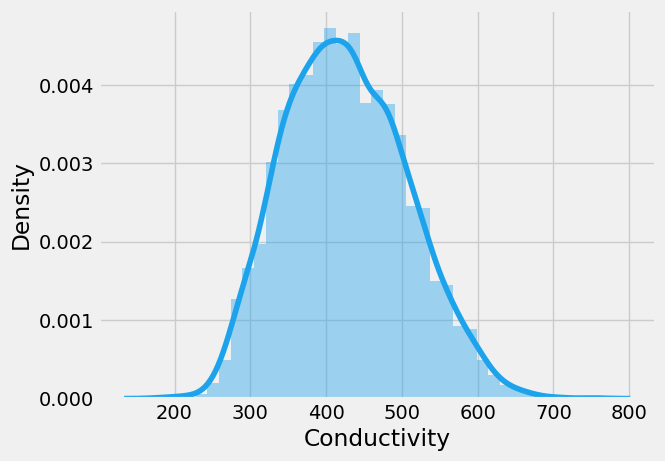

In [ ]:
sns.distplot(df[col[6]],color = '#1ca3ec')

* **7. TOC (Total Organic Carbon Content):** Water therefore needs to be continually monitored for signs of change in the TOC content to check it is safe for consumption. While many countries do not specifically regulate for TOC levels, the concentrations of specific volatile organic compounds are covered by legislation and recommended levels of TOC are 0.05 ml/l or less.3

<ipython-input-26-abfe61cd1fce>:1: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




<Axes: xlabel='Organic_carbon', ylabel='Density'>

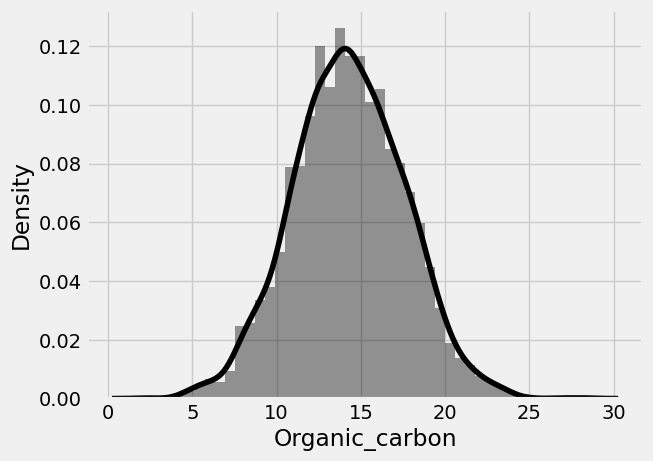

In [ ]:
sns.distplot(df[col[7]], color = 'black')

* **8. Total trihalomethanes (TTHM):** are a group of disinfection byproducts that form when chlorine compounds that are used to disinfect water react with other naturally occurring chemicals in the water.  They are colorless, and will evaporate out of the water into the air.

<ipython-input-27-3db23176bd8c>:1: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




<Axes: xlabel='Trihalomethanes', ylabel='Density'>

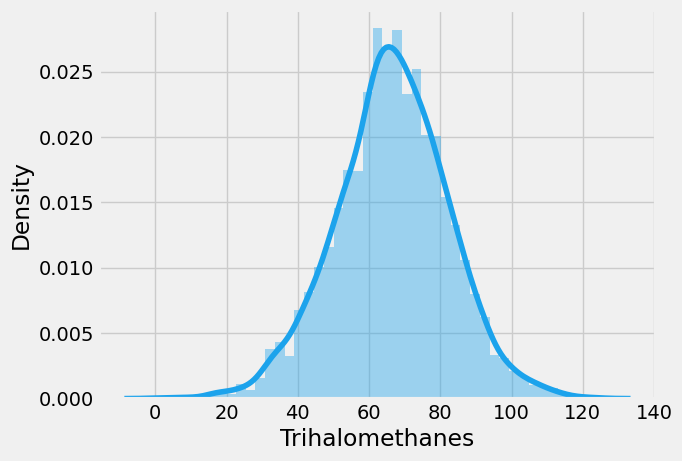

In [ ]:
sns.distplot(df[col[2]],color = '#1ca3ec')

<ipython-input-28-4bb714bb1436>:1: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




<Axes: xlabel='Turbidity', ylabel='Density'>

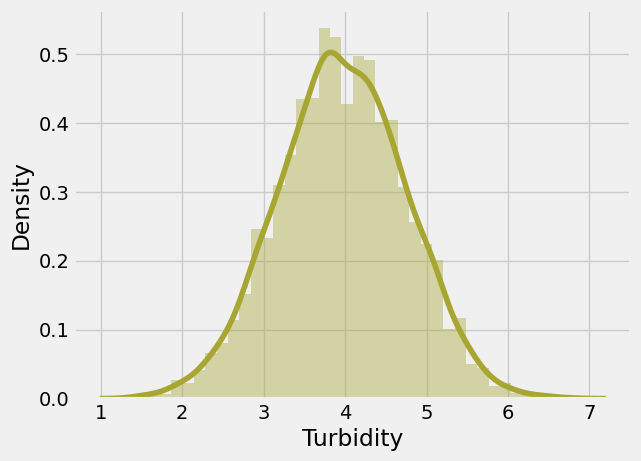

In [ ]:
sns.distplot(df[col[8]],color = '#a8a632')

([<matplotlib.patches.Wedge at 0x7f97796a4d00>,
 [Text(2.1133873090526625, 1.7595721303587262, 'Not potable'),
  Text(-2.2670882042564946, -1.8875410125666314, 'potable')],
 [Text(1.152756714028725, 0.9597666165593053, '61.0%'),
  Text(-1.3064576092325562, -1.0877354987672112, '39.0%')])

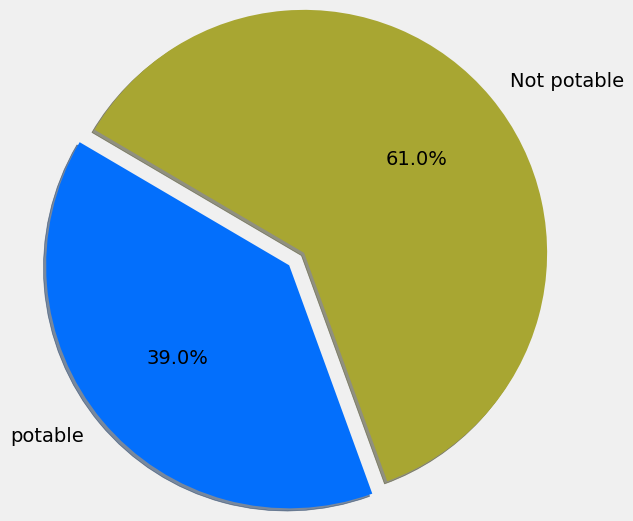

In [ ]:
plt.subplots(figsize=(100,3))
labels = ['Not potable','potable']
plt.pie(df['Potability'].value_counts(),  labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=290,radius = 2.5,explode = (0,0.2),colors = ['#a8a632','#036ffc'])

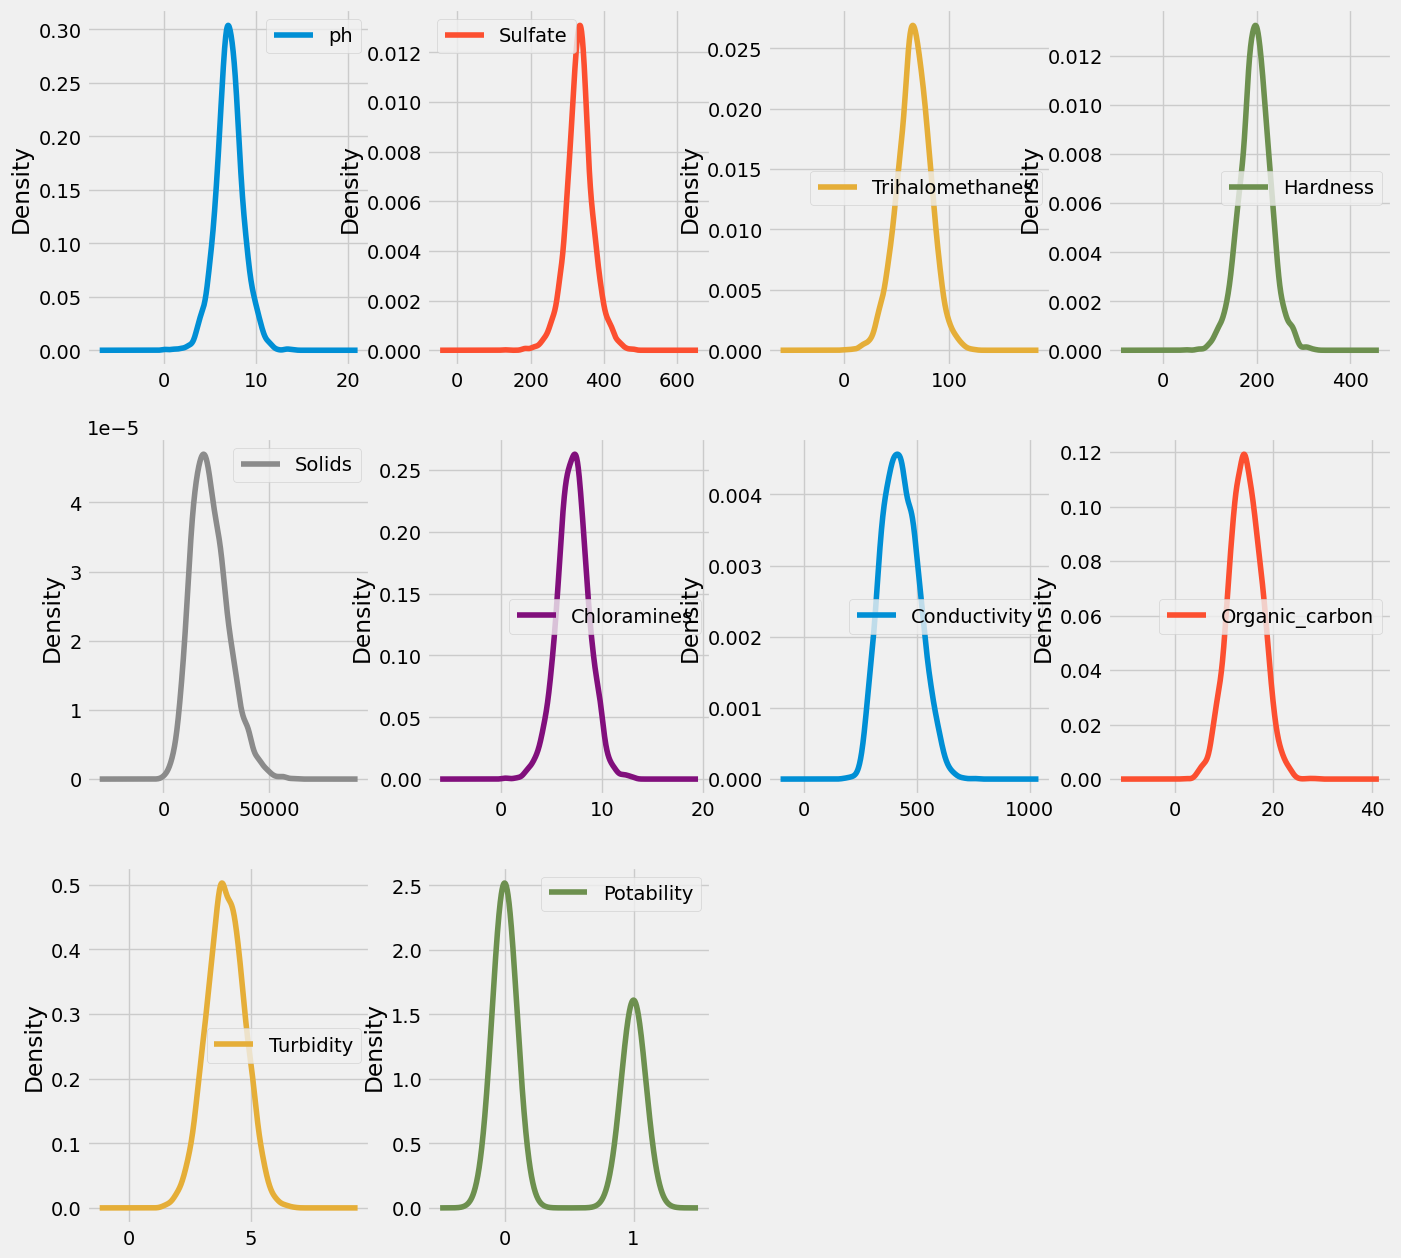

In [ ]:
# All in one graph 
df.plot(kind = "density",
                layout = (3,4),
                subplots = True,
                figsize = (15,15),
                sharex = False),
plt.show()

### Conclusion for univariate analysis:
* most of the plots are normal ditributed where mean and median are almost equal
* data is too sensitive and needed to be treated carefully 
* it clears here that features are widely scaled different from each other

## Bivariate Analysis :

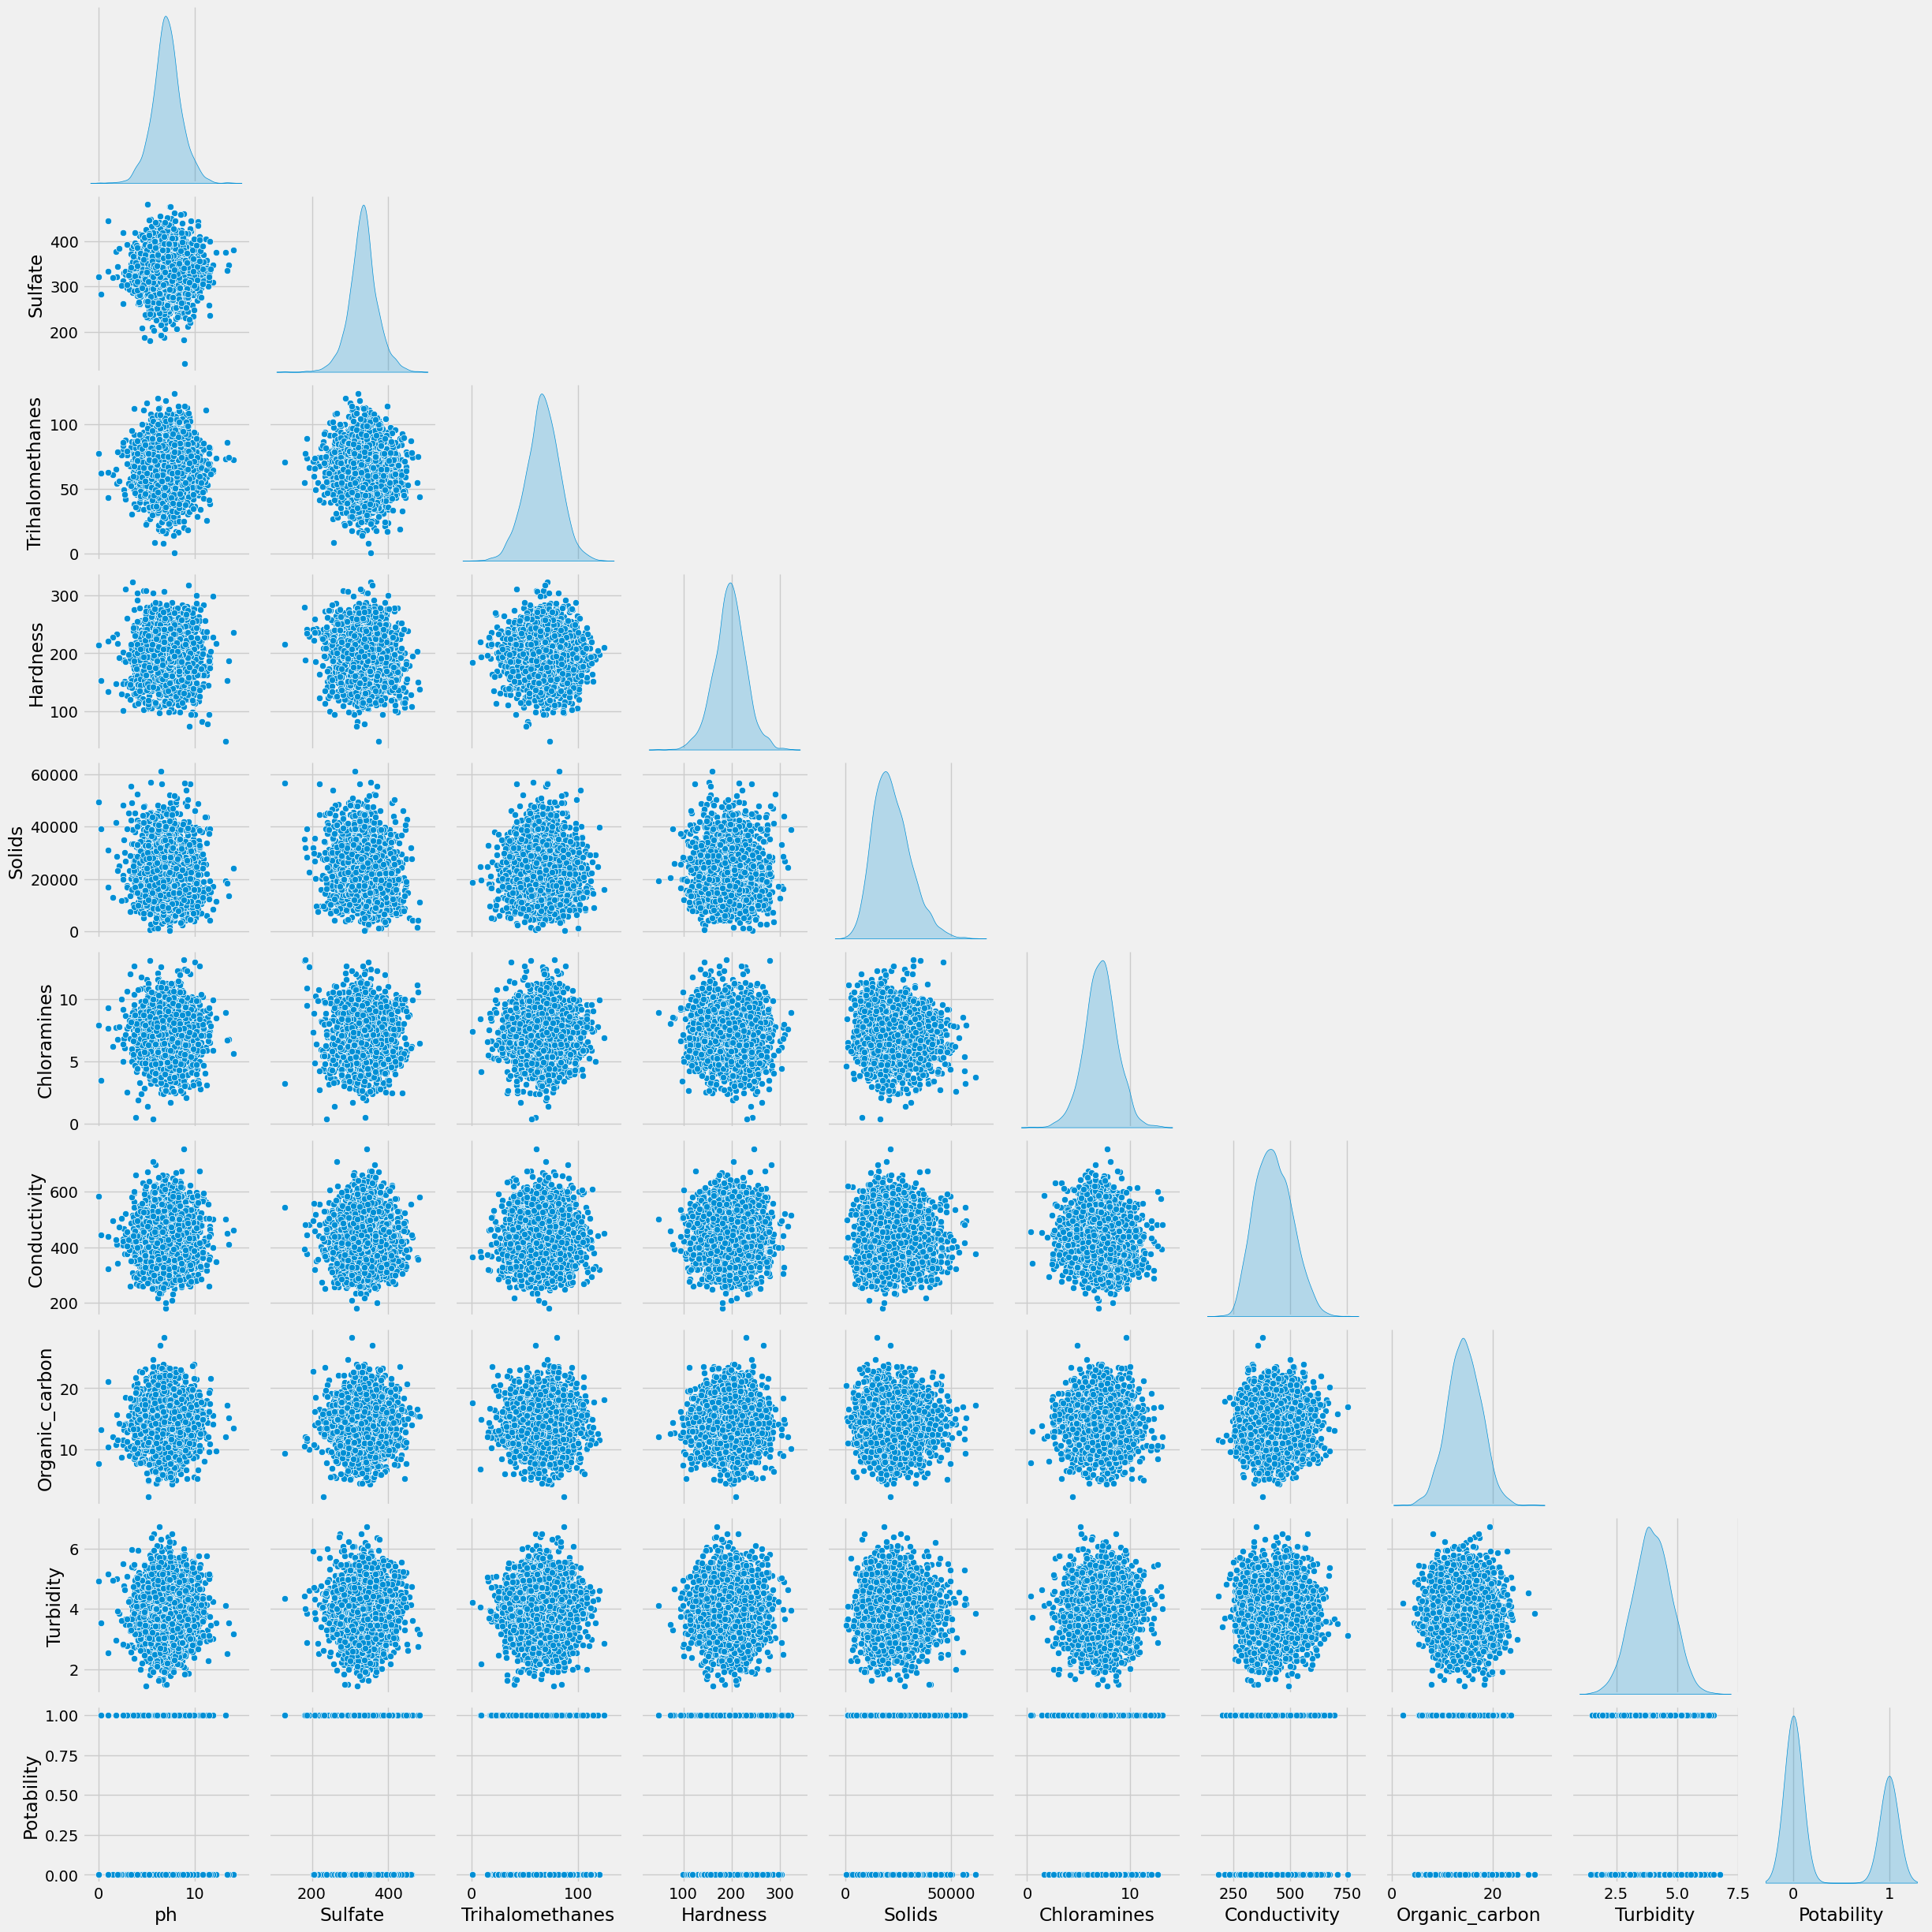

In [ ]:
# Correlation 
sns.pairplot(df[df.columns],diag_kind = "kde", corner = True)

The data looks too scattered but let's test it nearly

[]

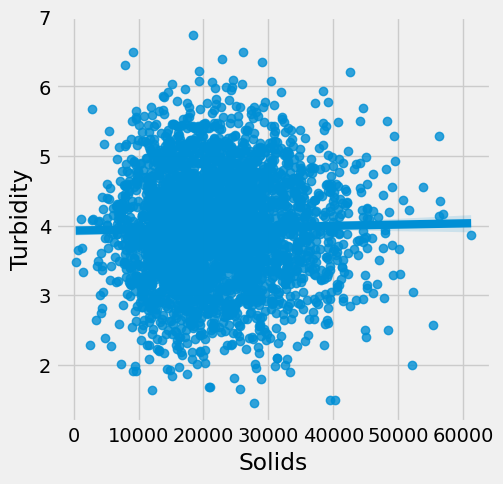

<Figure size 500x500 with 0 Axes>

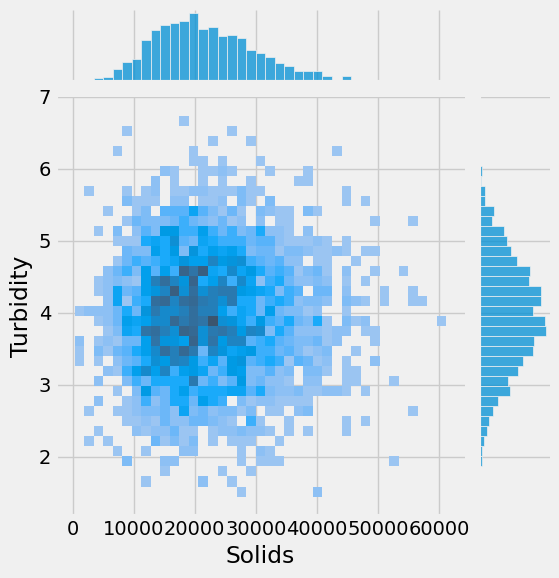

In [ ]:
plt.figure(figsize = (5,5))
sns.regplot(x='Solids',y='Turbidity',data = df)
plt.plot()
plt.figure(figsize = (5,5))
sns.jointplot(x='Solids',y='Turbidity',kind = 'hist',data = df)
plt.plot()

[]

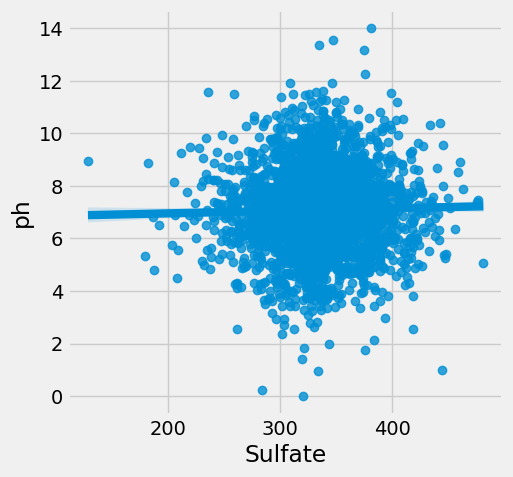

<Figure size 500x500 with 0 Axes>

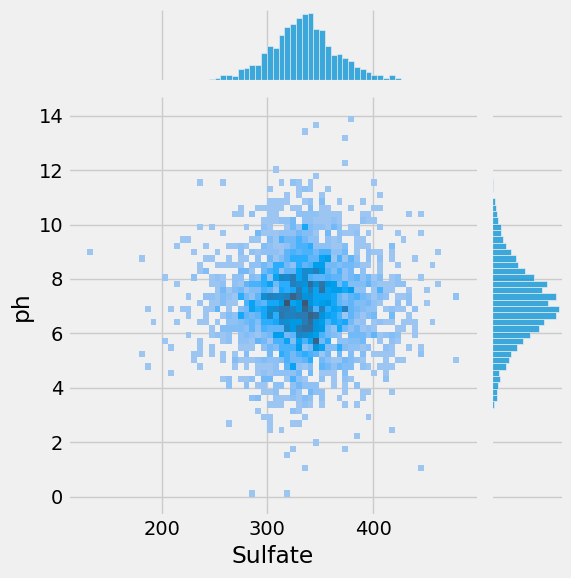

In [ ]:
plt.figure(figsize = (5,5))
sns.regplot(x='Sulfate',y='ph',data = df)
plt.plot()
plt.figure(figsize = (5,5))
sns.jointplot(x='Sulfate',y='ph',kind = 'hist',data = df)
plt.plot()

Due to replacing nulls with mean, regression and much concentration on the **mean area**

In [ ]:
df['ph_num'] = 0
for i, row in enumerate(df['ph']):
  if row == 3014:
    continue
  if (row>=0) and (row<1):
    df['ph_num'][i] = 1
  elif(row>=1) and (row<2):
    df['ph_num'][i] = 2
  elif(row>=2) and (row<3):
    df['ph_num'][i] = 3
  elif(row>=3) and (row<4):
    df['ph_num'][i] = 4
  elif(row>=4) and (row<5):
    df['ph_num'][i] = 5
  elif(row>=5) and (row<6):
    df['ph_num'][i] = 6
  elif(row>=6) and (row<7):
    df['ph_num'][i] = 7
  elif(row>=7) and (row<8):
    df['ph_num'][i] = 8
  elif(row>=8) and (row<9):
    df['ph_num'][i] = 9
  elif(row>=9) and (row<10):
    df['ph_num'][i] = 10
  elif(row>=10) and (row<11):
    df['ph_num'][i] = 11
  elif(row>=11) and (row<12):
    df['ph_num'][i] = 12
  elif(row>=12) and (row<13):
    df['ph_num'][i] = 13
  elif(row>=13) and (row<14):
    df['ph_num'][i] = 14

<ipython-input-34-6abdd9bedfee>:18: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-34-6abdd9bedfee>:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-34-6abdd9bedfee>:22: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-34-6abdd9bedfee>:24: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/

In [ ]:
ph_num = df['ph_num'].value_counts()
ph_num

7     918
8     905
9     465
6     429
10    207
5     170
11     79
4      58
12     20
3      12
2       4
14      4
1       4
13      1
Name: ph_num, dtype: int64

<Axes: xlabel='ph_num', ylabel='Count'>

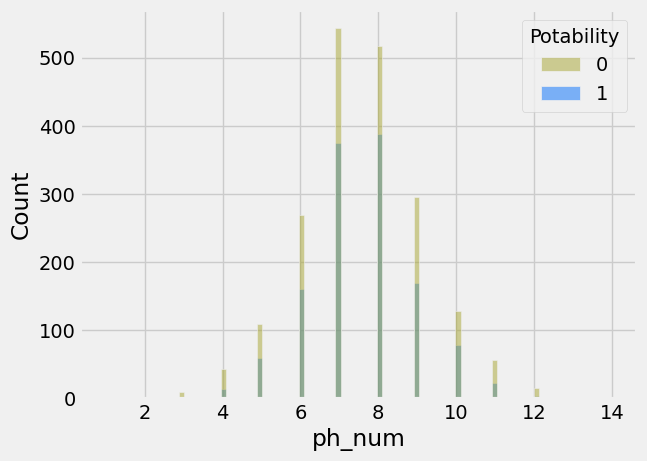

In [ ]:
sns.histplot(data = df,x = 'ph_num',hue = 'Potability',palette = ['#a8a632','#036ffc'],alpha = 0.5)

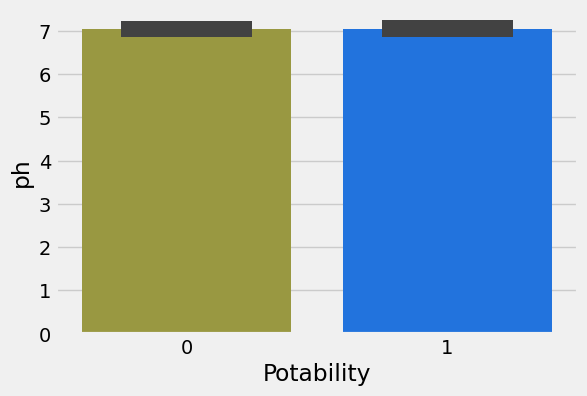

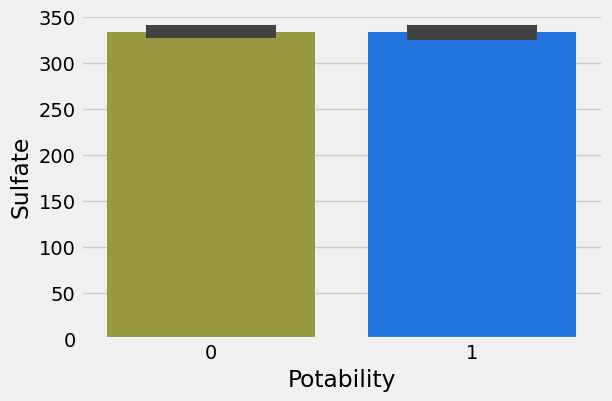

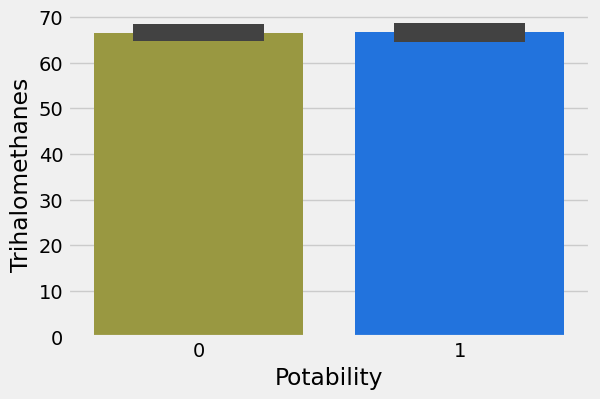

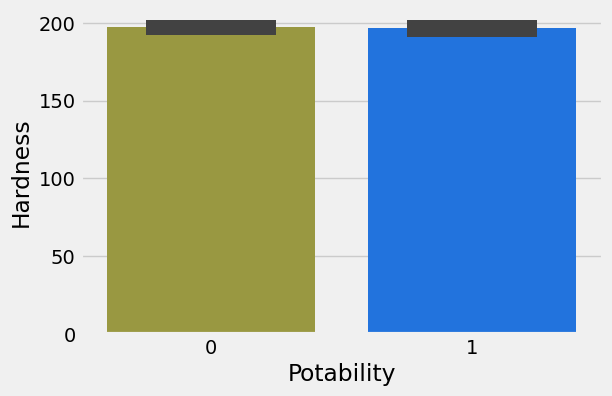

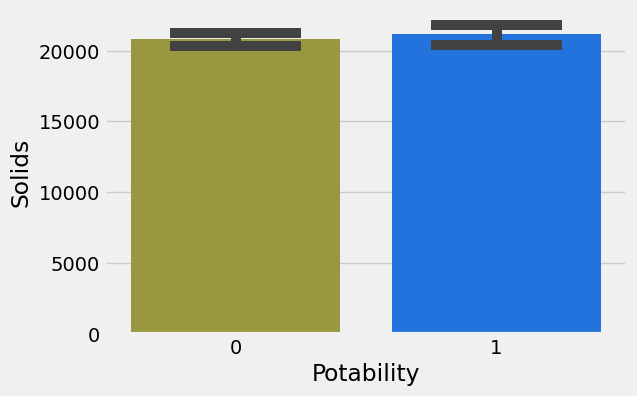

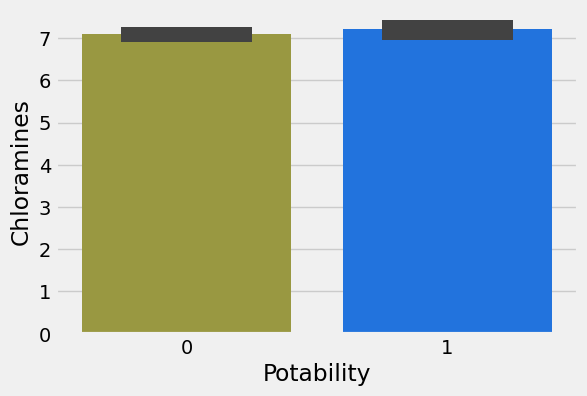

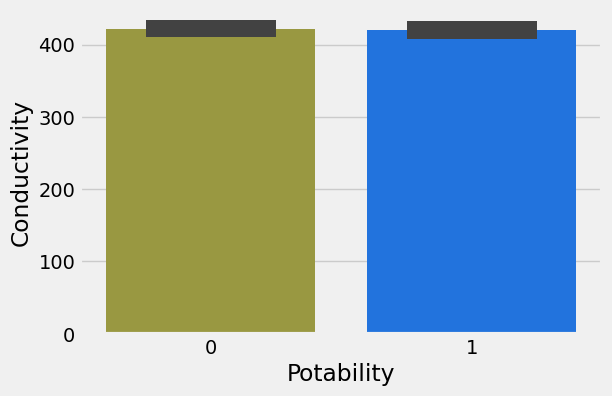

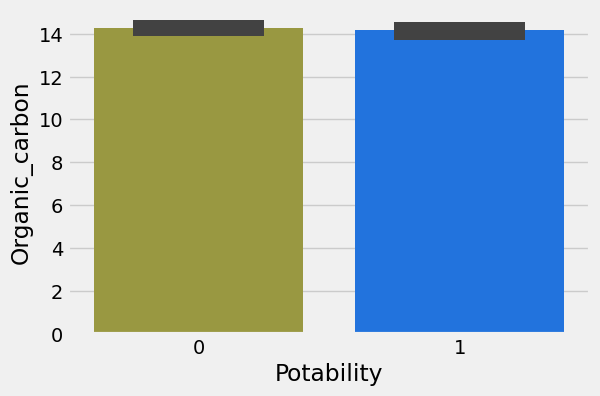

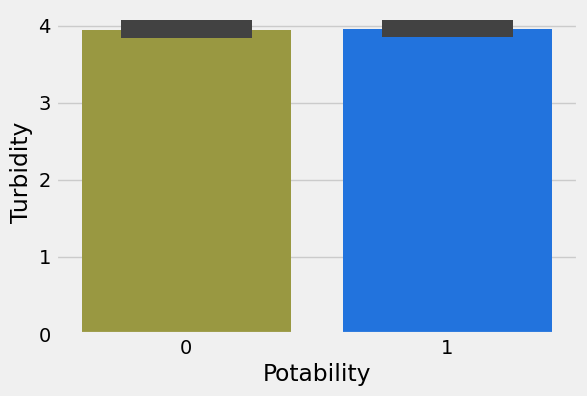

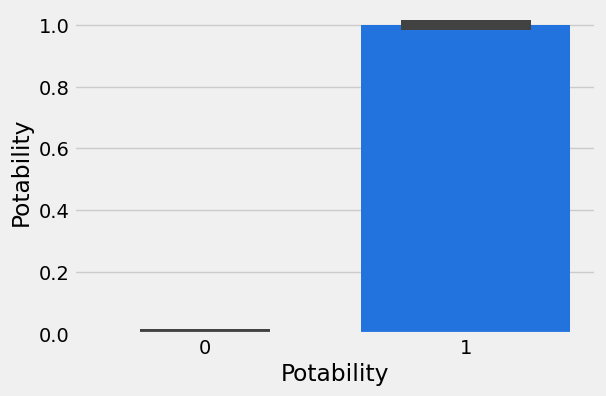

In [ ]:
for i in col:
  plt.figure(figsize = (6,4))
  sns.barplot(x=df['Potability'],y=df[i], estimator=np.median,capsize = 0.5,palette=["#a8a632","#036ffc"])
  print("")
  plt.show()
# no correlation between a feature and Potability!

<Axes: >

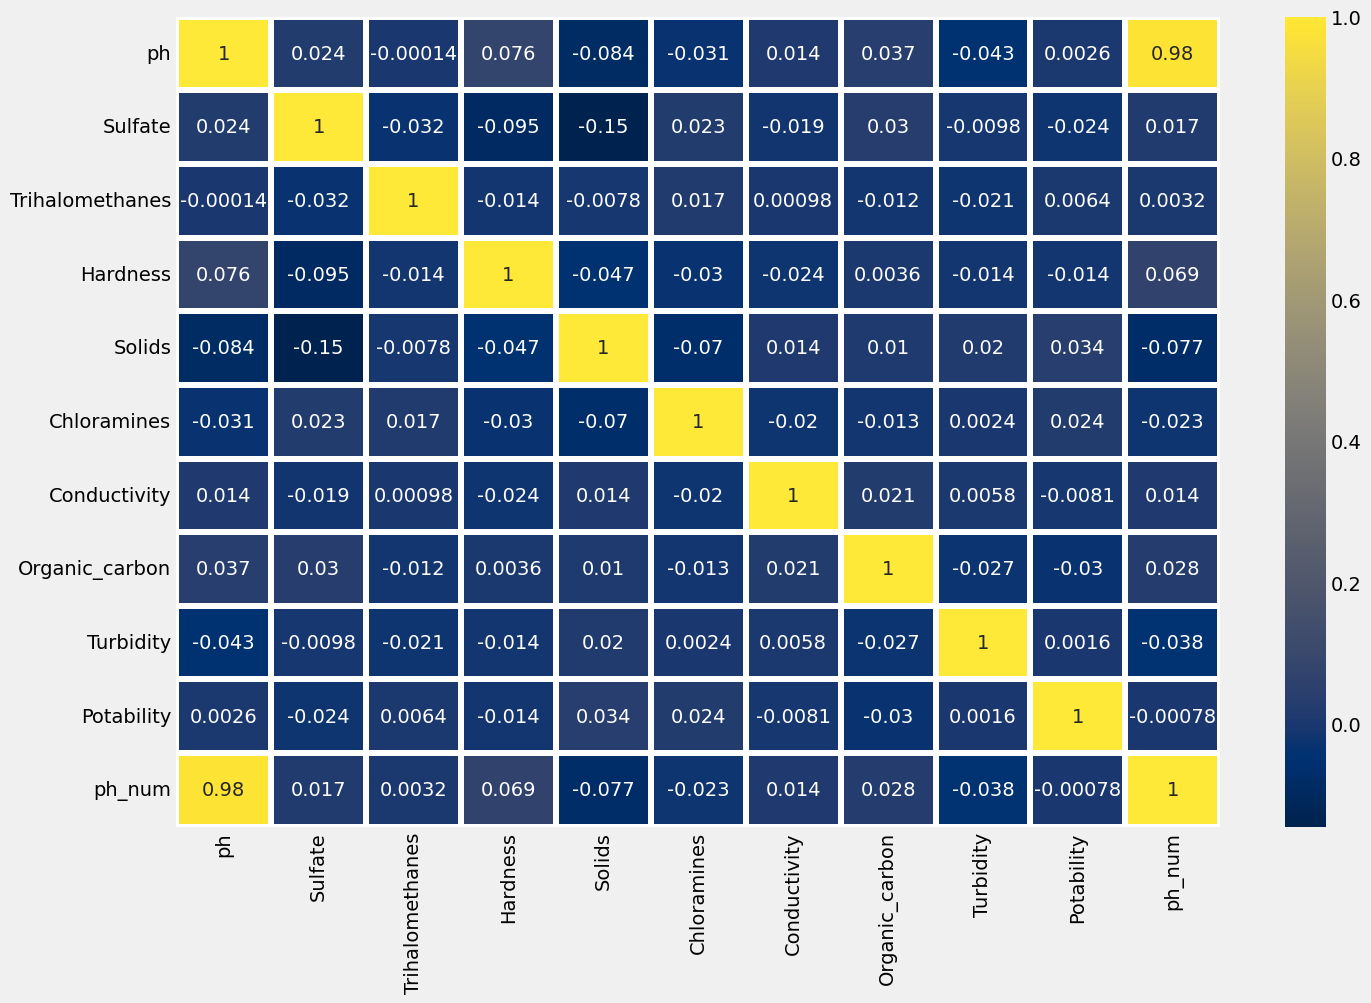

In [ ]:
plt.figure(figsize = (15,10))
sns.heatmap(df.corr(), annot = True, cmap = 'cividis',lw = 3)

Most of the features are not correlated with the target so we can use another plot to test it clearly

In [ ]:
print(df.corr()['Potability'].sort_values(ascending = False))
print("*"*50)
# let's find the most correlated neglecting negative correlation
print(df.corr().abs()['Potability'].sort_values(ascending = False))
# The highest correlation with potability is solids with only  percentage

Potability         1.000000
Solids             0.033743
Chloramines        0.023779
Trihalomethanes    0.006434
ph                 0.002595
Turbidity          0.001581
ph_num            -0.000778
Conductivity      -0.008128
Hardness          -0.013837
Sulfate           -0.023611
Organic_carbon    -0.030001
Name: Potability, dtype: float64
**************************************************
Potability         1.000000
Solids             0.033743
Organic_carbon     0.030001
Chloramines        0.023779
Sulfate            0.023611
Hardness           0.013837
Conductivity       0.008128
Trihalomethanes    0.006434
ph                 0.002595
Turbidity          0.001581
ph_num             0.000778
Name: Potability, dtype: float64


### Conclusion for bivariate analysis:
* Solids-Turbidity and sulfate-ph are not correlated unlike we have seen in the research
* All the data is wide scattered as the most correlated is solids with 0.03 with the Potability
* These led me to use cluster map as it identifies the relation between group of features with another group of any number of features

## Multivariate analysis :

Will be using `Cluster Map`.

How Cluster Map works ?

The `.clustermap()` method uses a hierarchical clusters to order data by similarity. This reorganizes the data for the rows and columns and displays similar content next to one another for even more depth of understanding the data.

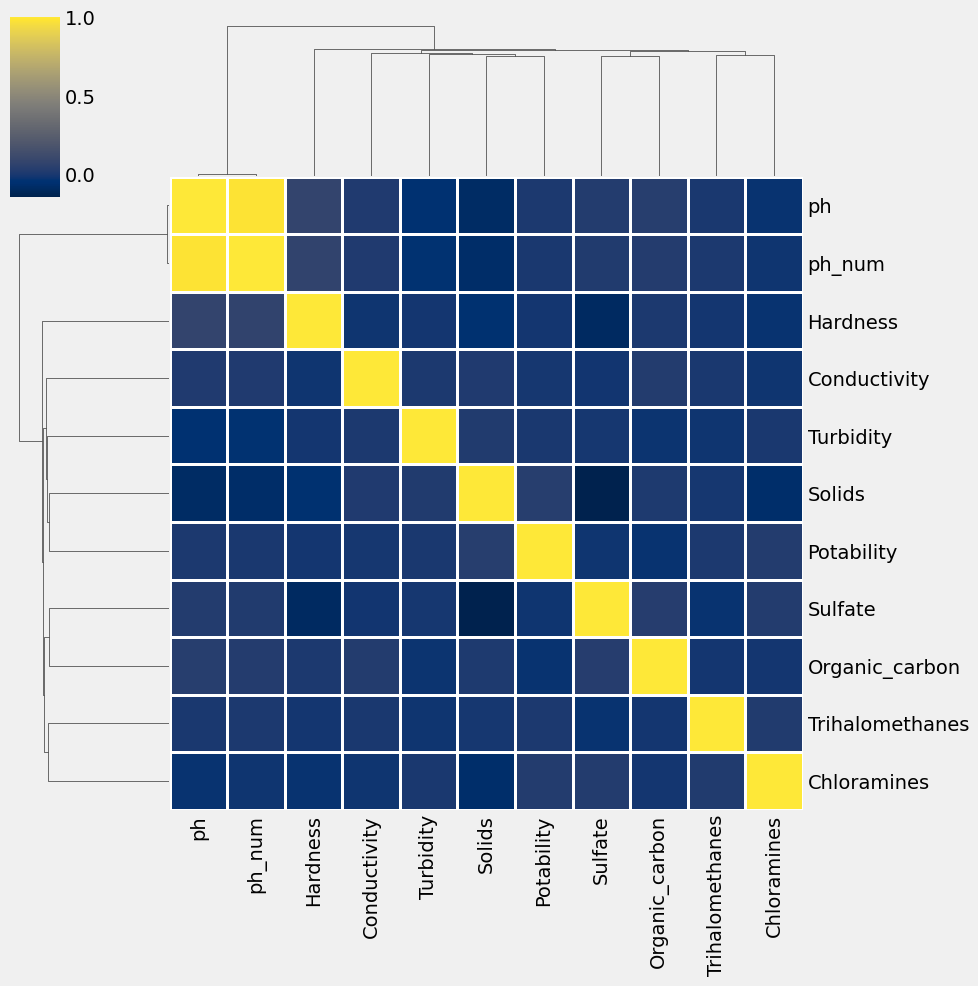

In [ ]:
sns.clustermap(df.corr(),lw = 1, cmap = 'cividis')

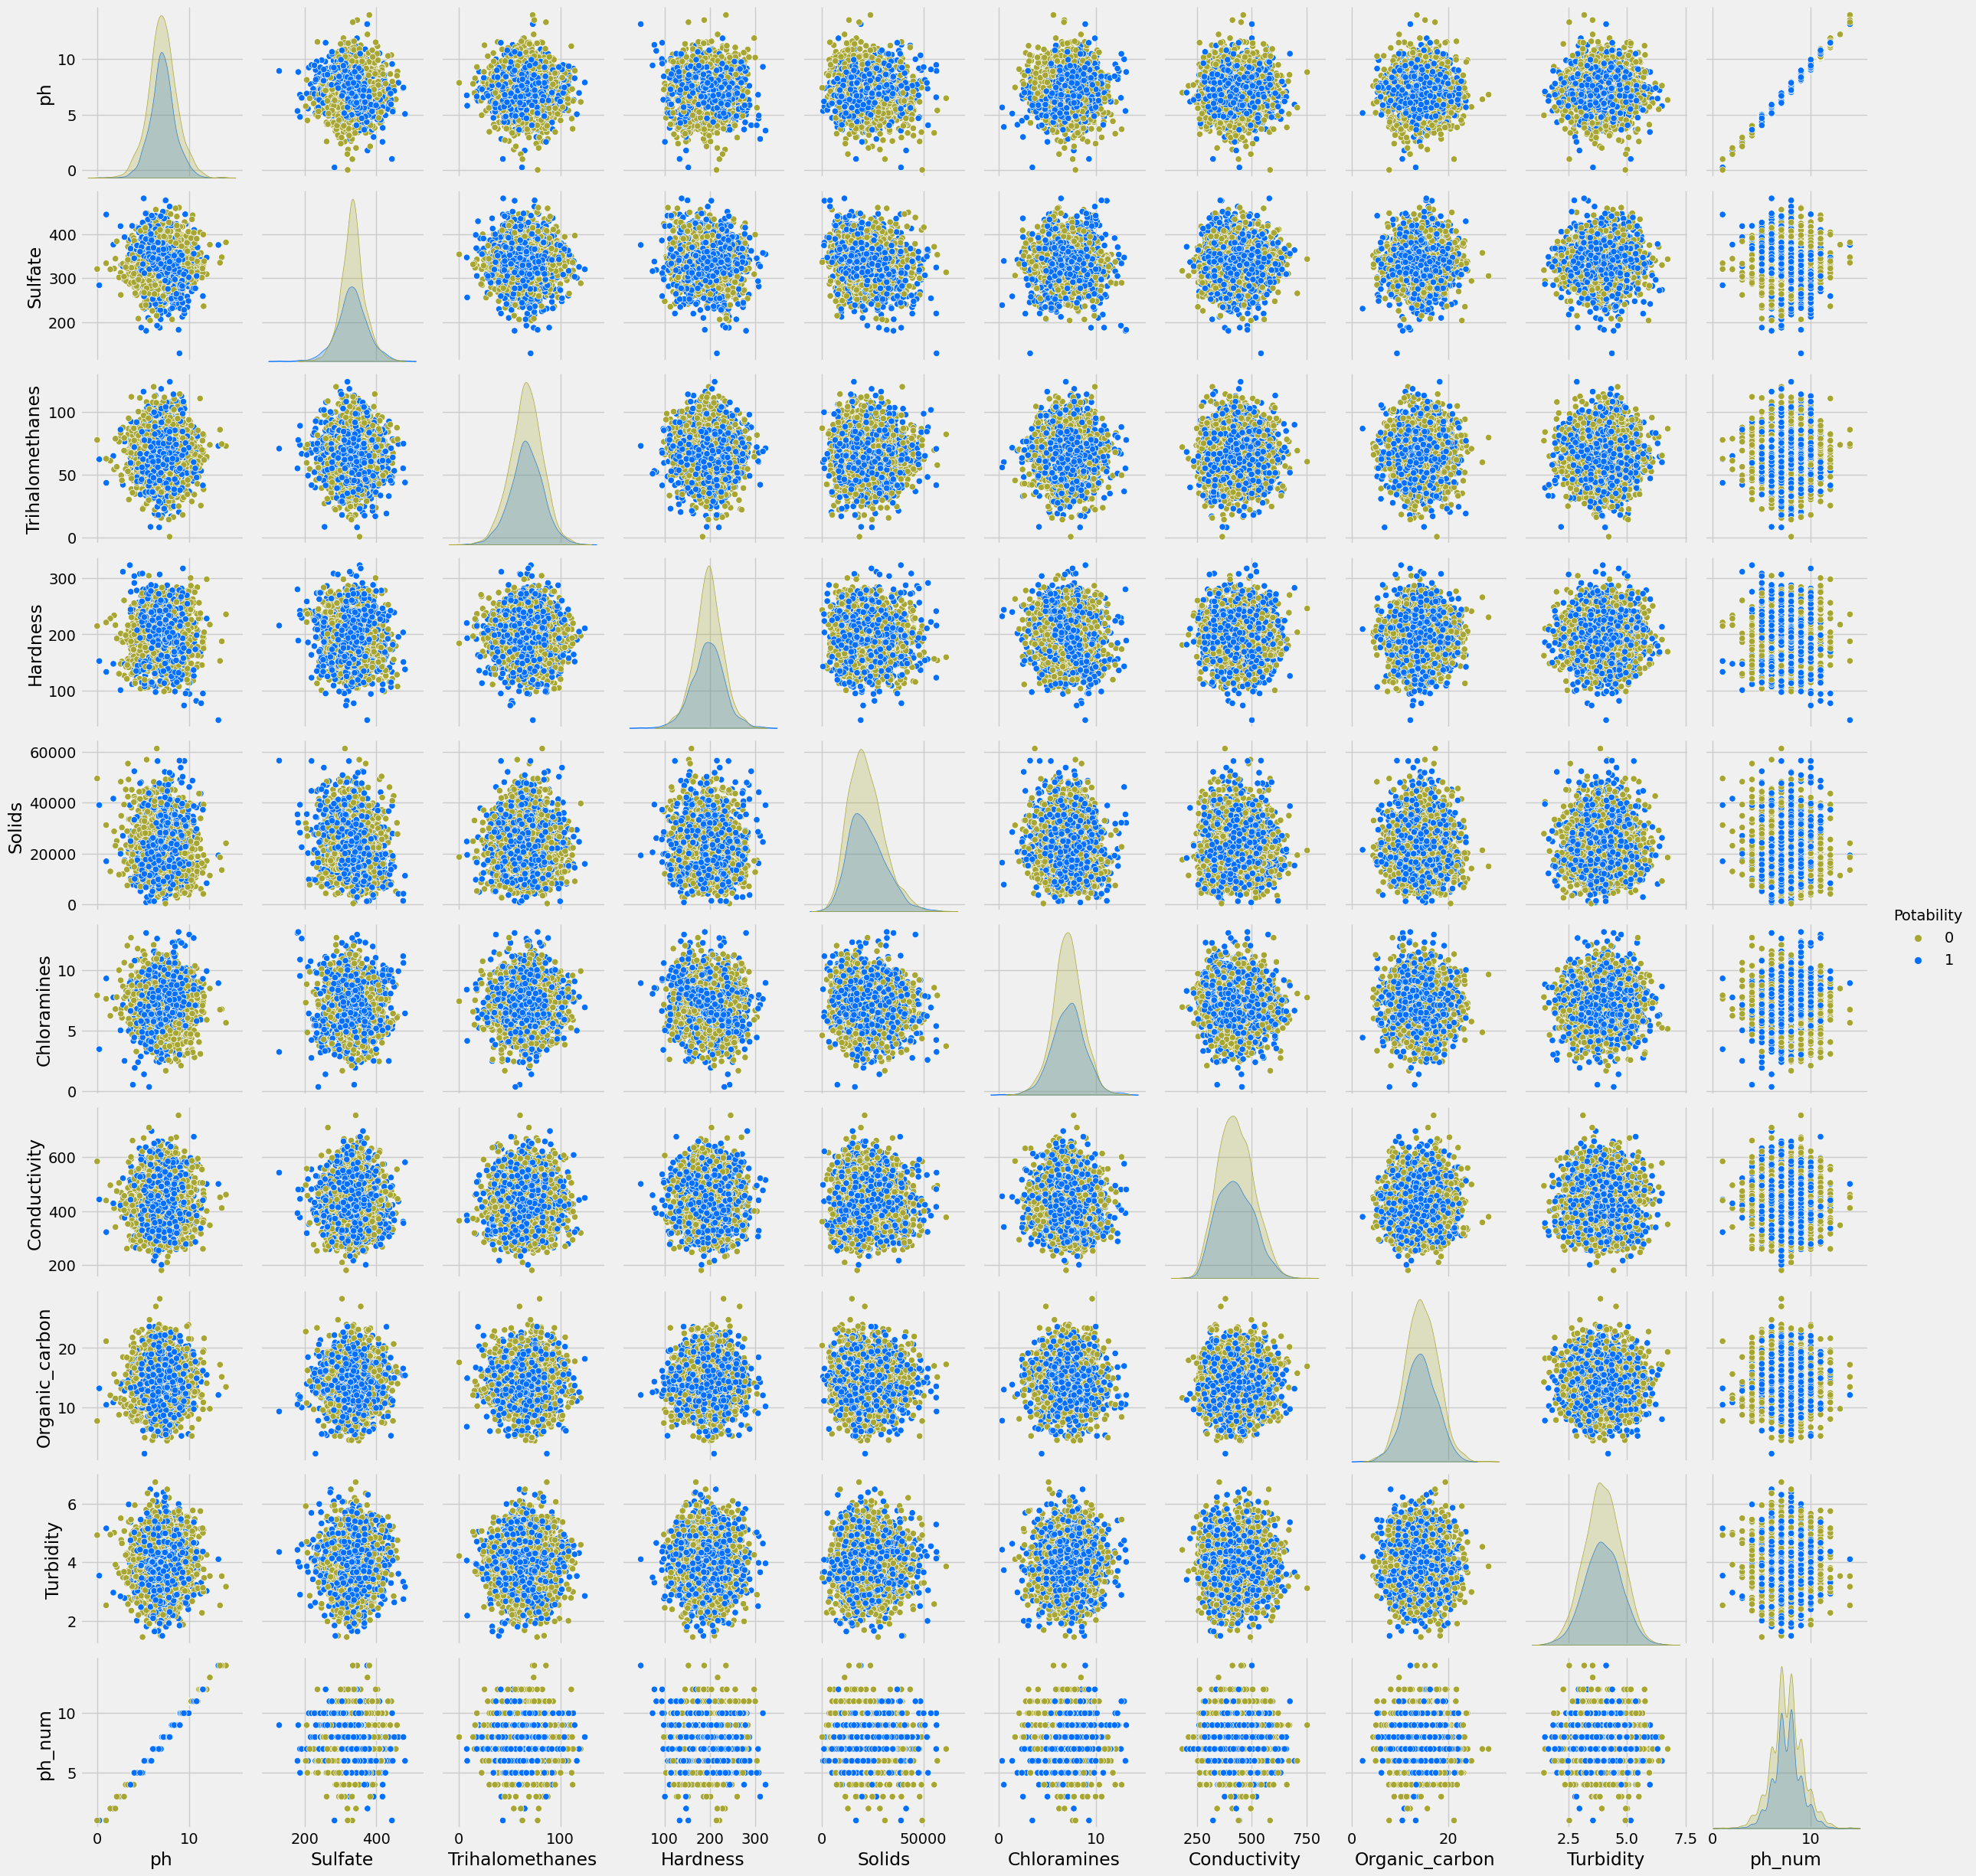

In [ ]:
sns.pairplot(df, hue="Potability", palette=['#a8a632','#036ffc'])

even the highest correlated has no patterns!

### Conclusion for multivariate analysis:
* Again there is no correlation 

* PH had an average of 7, this means that water is almost neither acidic or basic.
* Solids helps increasing the turbidity.
* Correlation between features were very low.
* 92% of the samples had high hardeness.
* Only 1.8% of the water samples were safe in terms of Sulfate levels.

In [ ]:
#df.to_csv('Water Potability Finall.csv')

# **Some Additional Preprocessing for Power Bi :**

In [ ]:
bins = [0,6.5, 8.5, 14]
labels = ['Acidic', 'neutral', 'Alkaline']

# use the cut() function to create the categorical column
df['ph_cat'] = pd.cut(df['ph'], bins=bins, labels=labels)

# print the resulting dataframe
df.head()

ph     Sulfate  Trihalomethanes    Hardness        Solids  \
0  6.746642  368.516441        86.990970  204.890455  20791.318981   
1  3.716080  334.506495        56.329076  129.422921  18630.057858   
2  8.099124  321.768097        66.420093  224.236259  19909.541732   
3  8.316766  356.886136       100.341674  214.373394  22018.417441   
4  9.092223  310.135738        31.997993  181.101509  17978.986339   

   Chloramines  Conductivity  Organic_carbon  Turbidity  Potability  ph_num  \
0     7.300212    564.308654       10.379783   2.963135           0       7   
1     6.635246    592.885359       15.180013   4.500656           0       4   
2     9.275884    418.606213       16.868637   3.055934           0       9   
3     8.059332    363.266516       18.436524   4.628771           0       9   
4     6.546600    398.410813       11.558279   4.075075           0      10   

     ph_cat  
0   neutral  
1    Acidic  
2   neutral  
3   neutral  
4  Alkaline

In [ ]:
df['Potability'].unique()

array([0, 1])

In [ ]:
bins = [0,100,110 ]
labels = ['Accepted', 'Rejected']

# use the cut() function to create the categorical column
df['Trihalomethanes_cat'] = pd.cut(df['Trihalomethanes'], bins=bins, labels=labels)

In [ ]:
bins = [100,120,180,280 ]
labels = ['Modarete', 'Hard' , 'Very Hard']

# use the cut() function to create the categorical column
df['Hardness_cat'] = pd.cut(df['Hardness'], bins=bins, labels=labels)

In [ ]:
bins = [300,600,900,1200,45000 ]
labels = ['Good', 'Fair' , 'Poor' , 'Unacceptable']

# use the cut() function to create the categorical column
df['Solids_cat'] = pd.cut(df['Solids'], bins=bins, labels=labels)

In [ ]:
bins = [1,5,12 ]
labels = ['Safe' , 'Unsafe']

# use the cut() function to create the categorical column
df['Chloramines_cat'] = pd.cut(df['Chloramines'], bins=bins, labels=labels)

In [ ]:
bins = [1,3,7 ]
labels = ['Turbid' , 'Not Turbid']

# use the cut() function to create the categorical column
df['Turbidity_cat'] = pd.cut(df['Turbidity'], bins=bins, labels=labels)

In [ ]:
df['Potability'].replace(to_replace=1,value="Yes",inplace=True)
df['Potability'].replace(to_replace=0,value="No",inplace=True)

In [ ]:
df.head()

# **Content created by** [ApplAi](https://www.linkedin.com/company/applaiasu/)
**Directed by :**
* Director of Machine Learning and Training Department: [Eslam Shouman](https://www.linkedin.com/in/eslam-shouman-0958091b4/)


**Team leader:**

* [Nour Ahmed](https://www.linkedin.com/in/nour-ahmeddd-/)


**Team Members:**

* [Jonathan Mounir](https://www.linkedin.com/in/jonathan-monir/)
* [Sarah Ahmed](https://www.linkedin.com/in/sarahhahmed)
* [Youmna Mohammed](https://www.linkedin.com/in/yomna-muhammed-b964a6270)
* [Habiba Alaa](https://www.linkedin.com/in/habiba-alaa17)

